# Bibliotecas

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Dataset

### Importar e Explorar Dataset

Training: 60000
Test: 10000


Text(0.5, 1.0, '9')

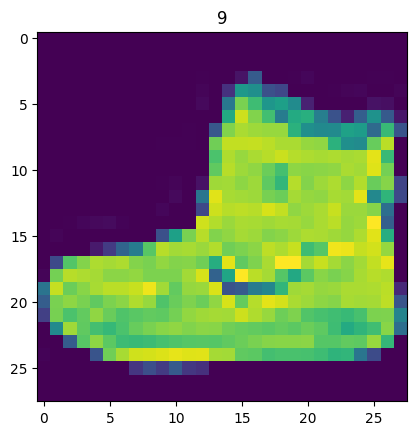

In [2]:
dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

print(f"Training: {len(x_train)}\nTest: {len(x_test)}")

plt.imshow(x_train[0])
plt.title(y_train[0])

### Exibir Dataset

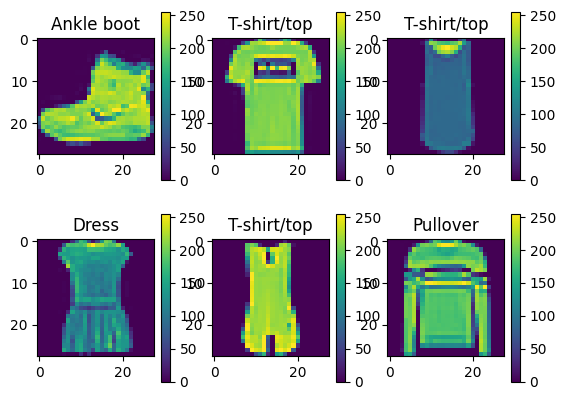

In [3]:
total_y = len(np.unique(y_train))
show_images = 6

clothing_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

for img in range(show_images):
    cols = show_images / 2
    lines = show_images / cols
    plt.subplot(int(lines), int(cols), img + 1)
    plt.imshow(x_train[img])
    plt.colorbar()
    plt.title(clothing_dict[y_train[img]])

# Definição de Camadas, Compilação e Treinamento

In [4]:
x_train = x_train / float(
    255
)  # Normalização dos Dados de Treino. Deixar valores de 0 a 1.

model = keras.Sequential(
    [
        keras.layers.Flatten(
            input_shape=(28, 28)
        ),  # Camada de Entrada. Achatamento das Imagens
        keras.layers.Dense(
            256, activation=tensorflow.nn.relu
        ),  # Todos os números negativos viram 0. Os positivos se mantém. Função Não-Linear. (Unidade Linear Retificada). Camada Oculta.
        # keras.layers.Dense(128, activation=tensorflow.nn.relu), # Todos os números negativos viram 0. Os positivos se mantém. Função Não-Linear. (Unidade Linear Retificada). Camada Oculta.
        # keras.layers.Dense(64, activation=tensorflow.nn.relu), # Todos os números negativos viram 0. Os positivos se mantém. Função Não-Linear. (Unidade Linear Retificada). Camada Oculta.
        keras.layers.Dropout(0.2),  # Deixa Neurônios dormentes. Tipo de Normalização.
        keras.layers.Dense(
            10, activation=tensorflow.nn.softmax
        ),  # Cria probabilidades para cada categoria. (0 a 1). Camada de Saída.
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5310 - accuracy: 0.8089 - val_loss: 0.4163 - val_accuracy: 0.8514
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3971 - accuracy: 0.8550 - val_loss: 0.3694 - val_accuracy: 0.8677
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3618 - accuracy: 0.8677 - val_loss: 0.3601 - val_accuracy: 0.8686
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3390 - accuracy: 0.8749 - val_loss: 0.3533 - val_accuracy: 0.8706
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3208 - accuracy: 0.8803 - val_loss: 0.3215 - val_accuracy: 0.8855


# Predição do Modelo e Cálculo de Métricas

In [5]:
predicted = model.predict(x_test)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}\nTest Loss: {loss}")

313/313 [==============================] - 0s 924us/step - loss: 53.9900 - accuracy: 0.8646
Test Accuracy: 0.8646000027656555
Test Loss: 53.98996353149414


### Visualização

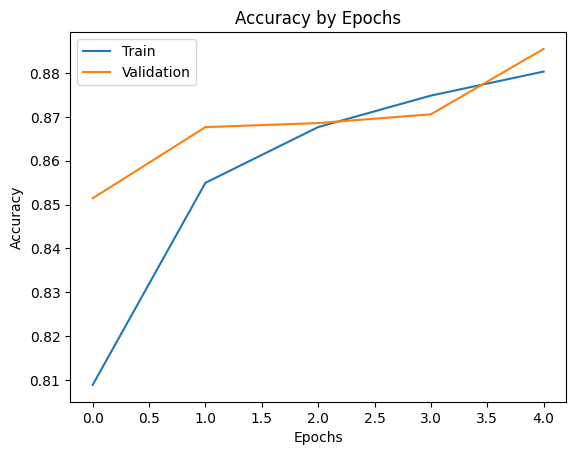

In [6]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

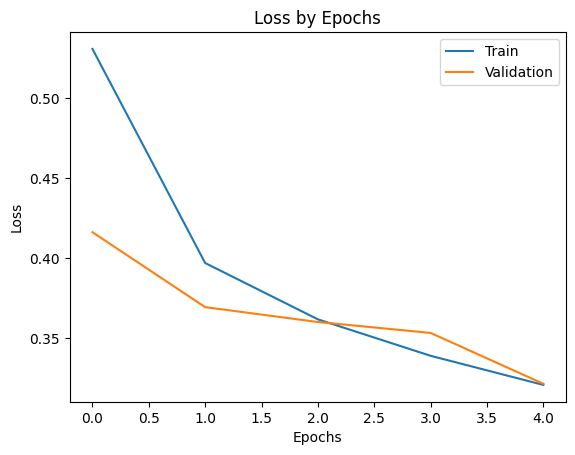

In [7]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

# Salvar e Carregar Modelos

In [8]:
model.save("model.h5")
model = load_model("model.h5")

c:\Users\jujun\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
